In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv(path_to_csv + "/AAPL.csv")

In [ ]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[199.63362103 199.76569642 199.8977718  200.02984719 200.16192257
 200.29399796 200.42607334 200.55814873 200.69022411 200.8222995
 200.95437488 201.08645027 201.21852565 201.35060104 201.48267642
 201.61475181 201.7468272  201.87890258 202.01097797 202.14305335
 202.27512874 202.40720412 202.53927951 202.67135489 202.80343028
 202.93550566 203.06758105 203.19965643 203.33173182 203.4638072 ]


In [ ]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [ ]:
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Testing RMSE:', test_rmse)

Testing RMSE: 24.551076796030607


In [ ]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_pred , y_test)
print("Testing MAE: {}".format(test_mae))

Testing MAE: 21.970896743316807


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Testing MAPE: ", test_mape)

Testing MAPE:  0.15130969514520884


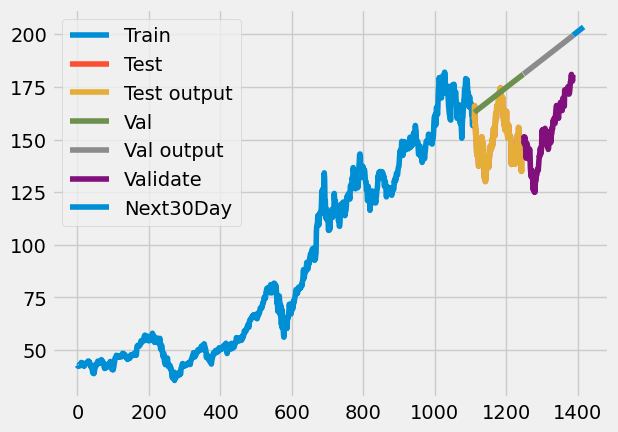

In [ ]:
plt.plot(train_data.index, train_data['Close'])

plt.plot(test_data.index, test_data['Close'])

plt.plot(test_data.index, y_test)

plt.plot(test_data.index, y_pred)

plt.plot(val_data.index, y_pred_val)

plt.plot(val_data.index, y_val)

plt.plot(last_data,y_next_30_days)

plt.legend(['Train', 'Test', 'Test output',  'Val', 'Val output','Validate','Next30Day'])
plt.show()

In [ ]:
24.